# Clustering of Countries

## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

## Goals

To categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [46]:
#import all the necessary libraries

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Data Loading and Understanding

In [47]:
#let's read the dataset
inp0 = pd.read_csv('Country-data.csv')
inp0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


From the data dictionary we can see imports,exports and health are in percentage values.Let's convert imports,exports and health spending from percentage values to actual values of their GDP per capita .Because the percentage values don't give a clear picture of that country. 

In [48]:
#Converting exports,imports and health spending percentages to absolute values.
inp0['exports'] = inp0['exports']*inp0['gdpp']/100
inp0['imports'] = inp0['imports']*inp0['gdpp']/100
inp0['health'] = inp0['health']*inp0['gdpp']/100

In [49]:
inp0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [50]:
inp0.shape

(167, 10)

In [51]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [52]:
inp0.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [53]:
inp0.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Data Preparation

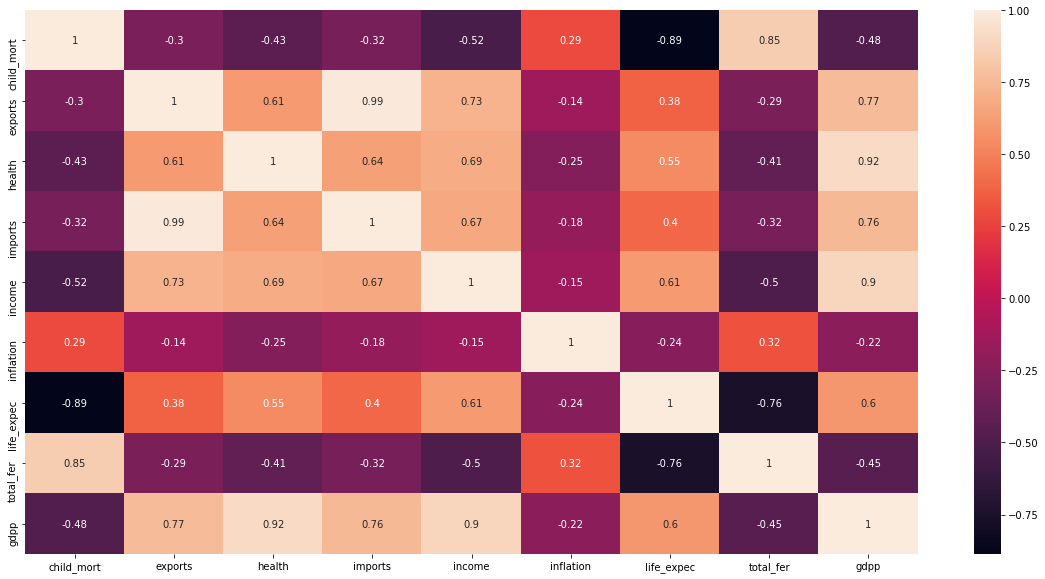

In [54]:
#first let's plot the correlation matrix and check if the data is indeed highly correlated
plt.figure(figsize = (20,10))
sns.heatmap(inp0.corr(), annot = True)
plt.show()

A lot of highly correlated variables exist, hence the usage of PCA is justified. Now let's proceed to doing it on the dataset

In [55]:
#The final matrix would only contain the data columns. Hence let's drop the country column
inp0_df = inp0.drop(['country'], axis=1)
inp0_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [56]:
#we observe that a lot of the data variables are of different orders of magnitude. 
#Let's do rescaling so that PCA can be applied.

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
dat2 = standard_scaler.fit_transform(inp0_df)



In [57]:
dat2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [58]:
#Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [59]:
#let's apply PCA
pca.fit(dat2)

PCA(random_state=42, svd_solver='randomized')

In [60]:
#List of PCA components.It would be the same as the number of variables
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [61]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

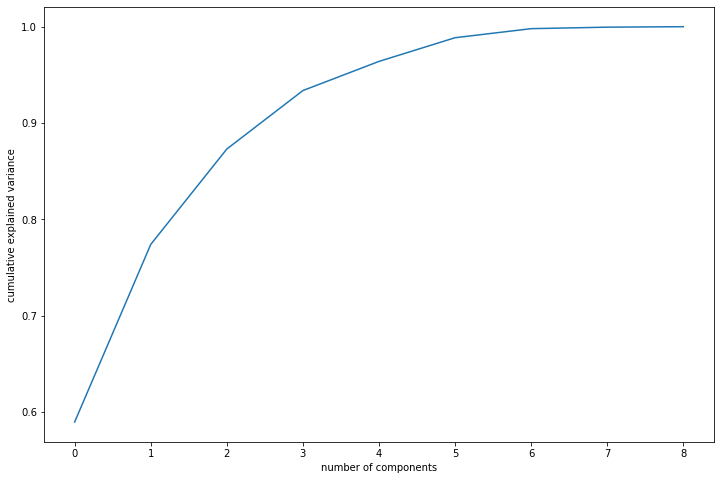

In [62]:
#Plotting the scree plot
#Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Clearly over 90% of the data is properly explained by the first 3 principal components. Let's use them only for our clustering process

In [63]:
#Let's try and check the first three components now
colnames = list(inp0.drop('country',axis=1).columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


Let's plot them to get a better idea about which variables are well explained by these 3 components. We'll use only the first 2 PCs here and check their variance.

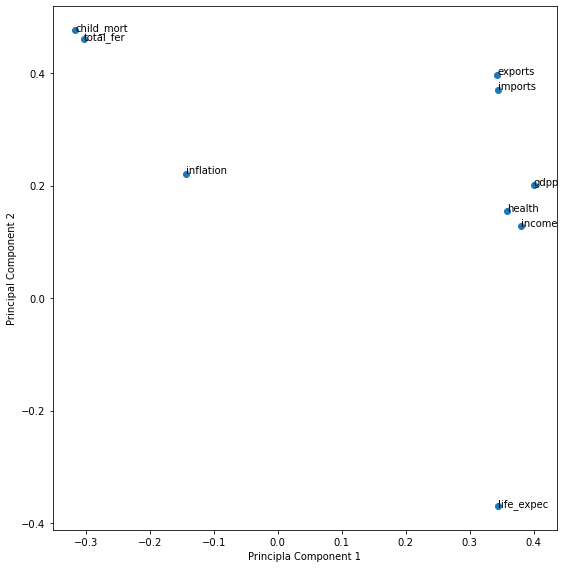

In [64]:
#Let's visualise the first 2 components

%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1,pcs_df.PC2)
plt.xlabel('Principla Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()    
plt.show()

A lot of variables have a good loading score on the first principal component. Similarly Child mortality and total fertility is well explained by the 2nd prinicpal component.

In [66]:
#We are observing 90% variance with 3 principal components. So let's take the data until that many components
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [67]:
#let's project our original data on the 3 principal components
df_train_pca = pca_final.fit_transform(dat2)
df_train_pca.shape

(167, 3)

In [68]:
#take the transpose of the PC matrix so that we can create the new matrix
pc = np.transpose(df_train_pca)
pc

array([[-2.63744157e+00, -2.22769569e-02, -4.57626261e-01,
        -2.72452030e+00,  6.49848516e-01,  3.71968554e-02,
        -3.32691520e-01,  3.18036154e+00,  3.81568156e+00,
        -4.67515152e-01,  1.49875246e+00,  1.47097104e+00,
        -1.01419903e+00,  8.45238116e-01, -1.34473920e-02,
         3.96087770e+00, -4.02707071e-01, -2.36598657e+00,
        -7.14998191e-01, -1.01778054e+00,  2.52812687e-01,
        -1.13095912e+00,  1.66280202e-01,  2.69525065e+00,
         2.80569006e-01, -2.75387449e+00, -2.76406823e+00,
        -1.17929406e+00, -2.44142939e+00,  3.39411994e+00,
        -5.23229456e-01, -3.24153046e+00, -3.18889212e+00,
         6.92394286e-01, -1.28851026e-01, -1.38822916e-02,
        -1.94991207e+00, -3.11679859e+00, -2.04776384e+00,
         4.31523541e-01, -2.57476033e+00,  8.46278142e-01,
         2.31379384e+00,  1.67463303e+00,  4.37600084e+00,
        -3.67788028e-01, -3.02658561e-01, -8.36646810e-01,
        -3.36572123e-01, -1.05577406e+00, -1.94848965e+0

In [69]:
#Let's create the newer matrix according to the given principal components
rownames = list(inp0['country'])
pcs_df2 = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pcs_df2.head()

,country,PC1,PC2,PC3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


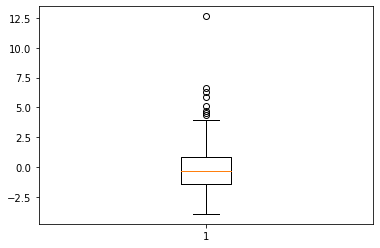

In [70]:
#Let's do the outlier analysis before proceeding to clustering
#We can reassign the outliers to the clusters later
plt.boxplot(pcs_df2.PC1)
Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

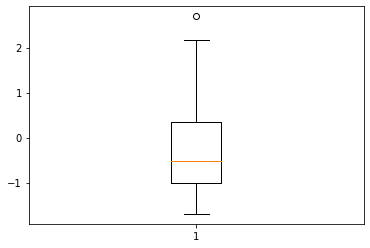

In [71]:

plt.boxplot(pcs_df2.PC2)
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

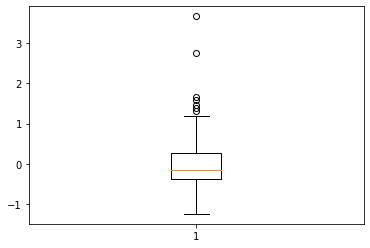

In [72]:
plt.boxplot(pcs_df2.PC3)
Q1 = pcs_df2.PC3.quantile(0.05)
Q3 = pcs_df2.PC3.quantile(0.95)
IQR = Q3 - Q1
pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1) & (pcs_df2.PC3 <= Q3)]

In [73]:
#Outlier analysis is now done.Let's check the data again.
pcs_df2.shape

(119, 4)

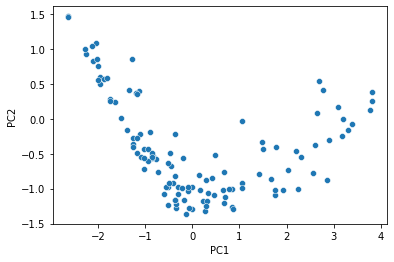

In [74]:
#let's check the spread of the dataset
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)
plt.show()

## Clustering

As we checked previously the dataset looks of similar magnitude. Hence no further standardisation is necessary. Let's proceed to calculating the Hopkins statistic to ensure that the data is good for clustering.

In [75]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample

from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [76]:
#Let's check the Hopkins measure
hopkins(pcs_df2.drop(['country'],axis=1))

0.7656511274428579

In [77]:
#0.77 is a okay Hopkins score. Hence the data is suitable for clustering. Preliminary check is now done.
#We can do standardisation again or else we can skip this step as well.
dat3 = pcs_df2
dat3_1 = standard_scaler.fit_transform(dat3.drop(['country'],axis=1))

## K-means Clustering

In [78]:
#Let's check the silhouette score first to identify the ideal number of clusters

from sklearn.metrics import silhouette_score
sse_= []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])


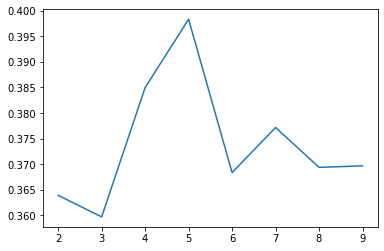

In [37]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

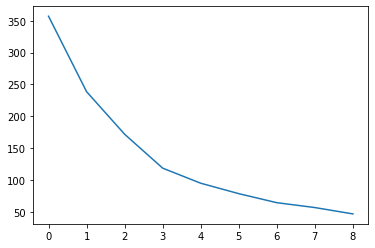

In [79]:
#The sihouette score reaches a peak at around 5 clusters indicating that it might be the ideal number of clusters.
#Let's use the elbow curve method to identify the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [80]:
#A distinct elbow is formed at around 3-7 clusters. Let's finally create the clusters and see for ourselves which ones fare better
#K-means with k=5 clusters
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(dat3_1)

KMeans(max_iter=50, n_clusters=5)

In [81]:
dat4=dat3
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus5.labels_)], axis=1)
dat_km.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']
dat_km.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,2
1,Algeria,-0.457626,-0.673301,0.961867,4
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,1
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,0


In [82]:
dat_km['ClusterID'].value_counts()

1    51
0    24
2    19
4    18
3     7
Name: ClusterID, dtype: int64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

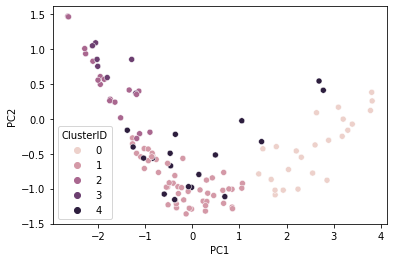

In [83]:
#Each cluster has a good number of countries associated with it(at least 5% of the dataset under consideration)
#Let's do some further visualizations.
#We'll be visualising the clusters on the original principal components
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

<AxesSubplot:xlabel='PC2', ylabel='PC3'>

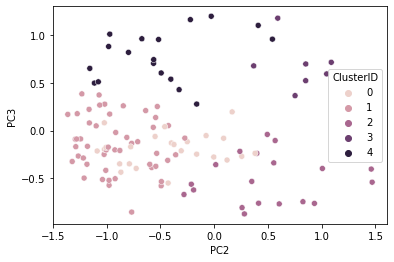

In [84]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',data=dat_km)

<AxesSubplot:xlabel='PC3', ylabel='PC1'>

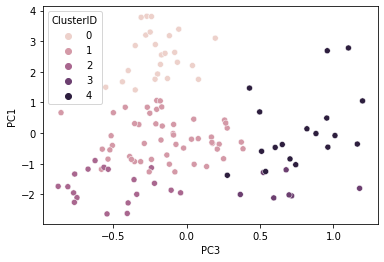

In [85]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',data=dat_km)

In [45]:
#One thing we noticed is some even though some distinct clusters are being formed, some are not so good.
#Now let's create the cluster means wrt to the various variables mentioned in the question and plot and see how they are related
dat5=pd.merge(inp0,dat_km,on='country')
dat6=dat5[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
clu_chi = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exp= 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_imp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_hea = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_inc = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inf = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())         
clu_lif = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_tot = 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

df = pd.concat([pd.Series([0,1,2,3,4]),clu_chi,clu_exp,clu_imp,clu_hea,clu_inc,clu_inf,clu_lif,clu_tot,clu_gdpp], axis=1)
df.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,21.766667,6286.320867,4368.055889,448.595522,22387.777778,13.855556,72.788889,2.221667,10623.888889
1,1,22.288235,2791.649273,3140.125002,397.399039,11103.137255,4.564137,73.003922,2.330784,6122.392157
2,2,65.084211,787.408095,969.381895,145.439137,3983.157895,6.446842,61.657895,4.266842,2025.947368
3,3,4.820833,13514.487500,13502.583333,3516.844583,34570.833333,1.182625,80.137500,1.707917,35108.333333
4,4,67.085714,1547.557143,961.131429,147.828571,6788.571429,18.942857,64.957143,4.627143,3041.428571


We observe that Child mortality, Income, Inflation and GDP per capita are good predictors for the development of a country. On cross-checking with the original Principal components that we drew, these 4 components had good scores. Hence we can say that they are a good source of information for the Clustering Process.Let's visualise the clusters along these.

<AxesSubplot:xlabel='child_mort', ylabel='income'>

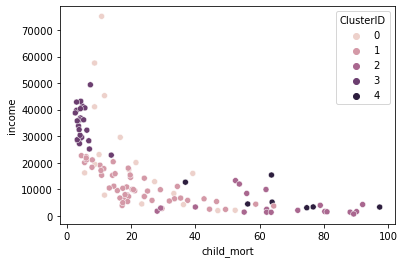

In [86]:
#Along child-mortality and income
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=dat6)

In [87]:
#let's take a look at those countries clusters and try to make sense if the clustering process worked well.
dat6[dat6['ClusterID']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Algeria,27.3,1712.6400,1400.440,185.9820,12900,16.10,76.5,2.89,4460,0
6,Azerbaijan,39.2,3171.1200,1208.880,343.3920,16000,13.80,69.1,1.92,5840,0
8,Bahrain,8.6,14386.5000,10536.300,1028.7900,41100,7.44,76.0,2.16,20700,0
11,Belarus,5.5,3099.4200,3889.350,338.2830,16200,15.10,70.4,1.49,6030,0
21,Chile,8.7,4863.3000,4037.700,1026.8400,19400,8.96,79.1,1.88,12900,0
50,Indonesia,33.3,755.7300,696.640,81.1710,8430,15.30,69.9,2.48,3110,0
51,Iran,19.3,1593.3200,1266.820,365.6800,17400,15.90,74.5,1.76,6530,0
58,Kazakhstan,21.5,4008.9400,2711.930,389.1030,20100,19.50,68.4,2.60,9070,0
60,Kuwait,10.8,25679.5000,11704.000,1012.5500,75200,11.20,78.2,2.21,38500,0
65,Libya,16.6,7937.6000,5094.100,469.4800,29600,14.20,76.1,2.41,12100,0


<AxesSubplot:xlabel='income', ylabel='gdpp'>

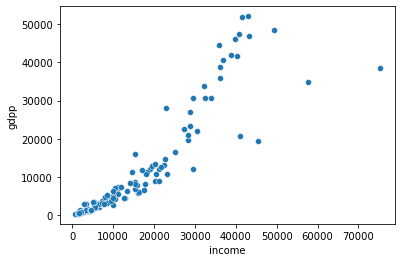

In [88]:
#K-means has done a satisfactory job here. Let's take a different approach and make the clusters only on the basis of these
sns.scatterplot(x='income',y='gdpp',data=dat6)

From the clusters it is observed that cluster 2 and 4 have pretty low values of the 4 indicators that we chose. Hence these are the countries that we need to focus.

## Hierarchical Clustering

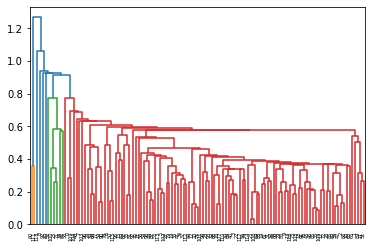

In [89]:
#Let's try hierarchical clustering to see if it works well
#First we'll try the single linkage procedure.
mergings = linkage(dat3_1, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

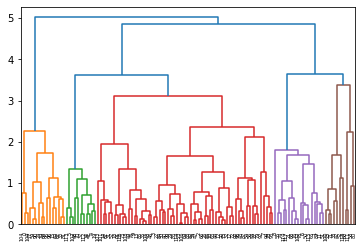

In [90]:
#We don't get good results here.
#Let's try complete linkage method
mergings = linkage(dat3_1, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [91]:
#Okay now we are seeing some good clusters here. Let's see if they make sense if we eliminate the barriers
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
dat3_hc = pd.concat([dat3, clusterCut], axis=1)
dat3_hc.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']

In [92]:
dat3_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,2
4,Australia,3.180362,-0.250785,-0.116877,3


In [94]:
dat7=pd.merge(inp0,dat3_hc,on='country')
dat8=dat7[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
dat8.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,2
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,2
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,3


In [95]:
dat8['ClusterID'].value_counts()

2    63
1    18
0    16
4    11
3    11
Name: ClusterID, dtype: int64

In [96]:
#Cluster 4 doesn't have enough amount of clusters. Let's see if other clusters are good or not.
dat8[dat8['ClusterID']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.440,76.8,2.13,12200,2
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.770,73.3,1.69,3220,2
7,Bahamas,13.8,9800.00,12236.000,2209.2000,22900,-0.393,73.8,1.86,28000,2
9,Bangladesh,49.4,121.28,165.244,26.6816,2440,7.140,70.4,2.33,758,2
10,Barbados,14.2,6320.00,7792.000,1275.2000,15300,0.321,76.7,1.78,16000,2
...,...,...,...,...,...,...,...,...,...,...,...
105,Tonga,17.4,440.20,2140.650,179.9850,4980,3.680,69.9,3.91,3550,2
106,Tunisia,17.4,2090.70,2289.420,257.0940,10400,3.820,76.9,2.14,4140,2
108,Turkmenistan,62.0,3387.72,1975.800,111.0000,9940,2.310,67.9,2.83,4440,2
114,Uruguay,10.6,3129.70,3022.600,993.6500,17100,4.910,76.4,2.08,11900,2


In [97]:
dat8[dat8['ClusterID']==1]
#this would be the cluster that we need to focus on

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Algeria,27.3,1712.6400,1400.440,185.982,12900,16.10,76.5,2.89,4460,1
6,Azerbaijan,39.2,3171.1200,1208.880,343.392,16000,13.80,69.1,1.92,5840,1
8,Bahrain,8.6,14386.5000,10536.300,1028.790,41100,7.44,76.0,2.16,20700,1
11,Belarus,5.5,3099.4200,3889.350,338.283,16200,15.10,70.4,1.49,6030,1
16,Brazil,19.8,1198.4000,1321.600,1009.120,14500,8.41,74.2,1.80,11200,1
21,Chile,8.7,4863.3000,4037.700,1026.840,19400,8.96,79.1,1.88,12900,1
50,Indonesia,33.3,755.7300,696.640,81.171,8430,15.30,69.9,2.48,3110,1
51,Iran,19.3,1593.3200,1266.820,365.680,17400,15.90,74.5,1.76,6530,1
55,Jamaica,18.1,1464.8400,2321.280,225.108,8000,9.81,74.7,2.17,4680,1
65,Libya,16.6,7937.6000,5094.100,469.480,29600,14.20,76.1,2.41,12100,1


In [98]:
dat8[dat8['ClusterID']==0]
#this would be the cluster that we need to focus on

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,0
15,Botswana,52.5,2768.6000,3257.550,527.0500,13300,8.92,57.1,2.88,6350,0
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,0
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,0
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,0
62,Lao,78.9,403.5600,562.020,50.9580,3980,9.20,63.8,3.15,1140,0
64,Liberia,89.3,62.4570,302.802,38.5860,700,5.47,60.8,5.02,327,0
67,Madagascar,62.2,103.2500,177.590,15.5701,1390,8.79,60.8,4.60,413,0
77,Namibia,56.0,2480.8200,3150.330,351.8820,8460,3.56,58.6,3.60,5190,0
